In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,mean_absolute_percentage_error, explained_variance_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
import seaborn as sns
import matplotlib.pyplot as plt




In [4]:
df = pd.read_csv('synthetic_data.csv')

# Hedef Veri: "Mutasyon (%)" 
target = 'Mutation (%)'
X = df.drop(columns=[target])
y = df[target]

# Train-Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

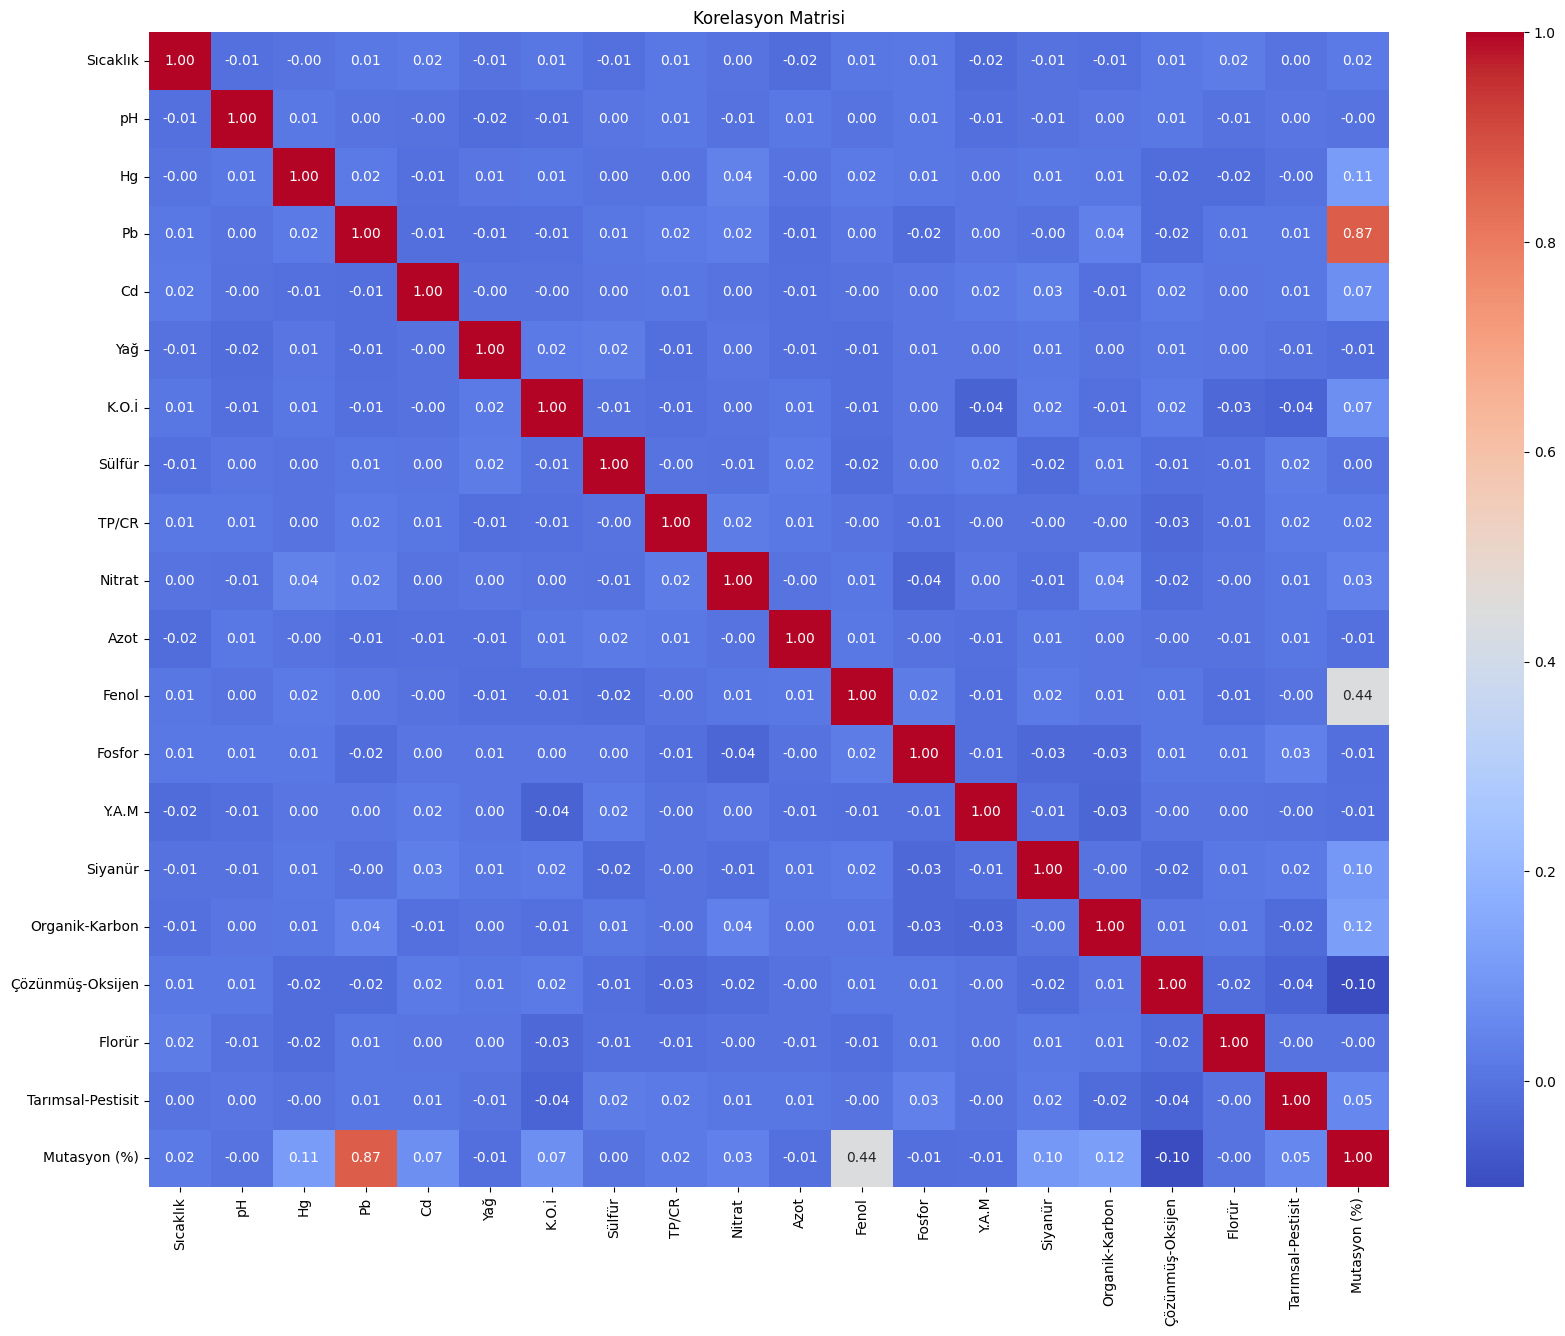

In [14]:
# Korelasyon Matrixi

corr_matrix = df.corr()


plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Korelasyon Matrisi")
plt.show()


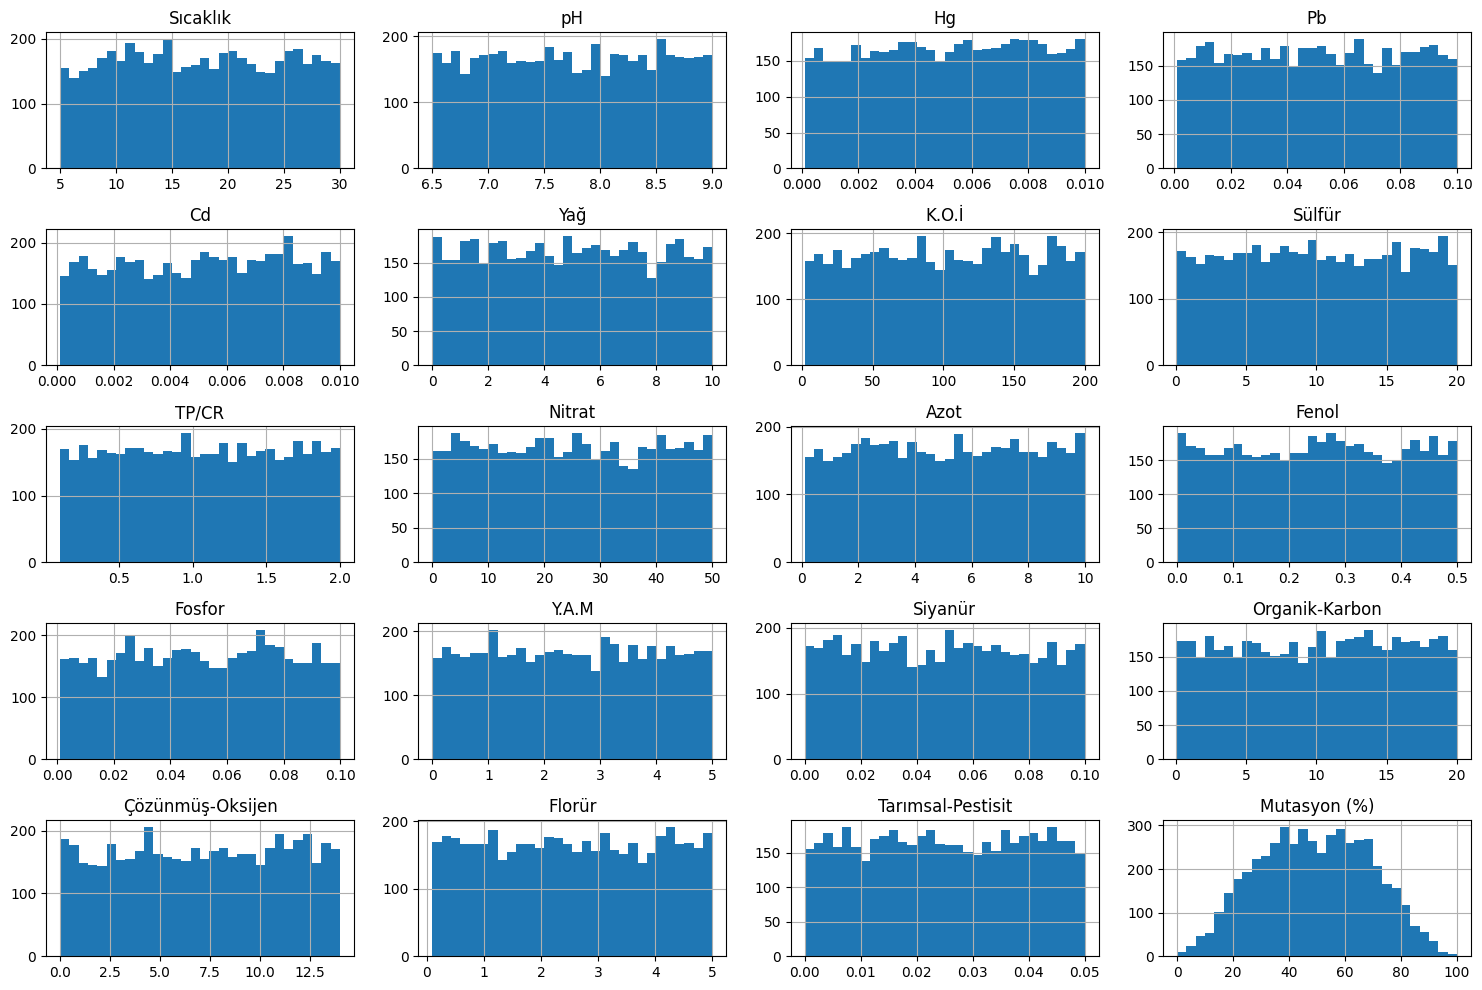

In [15]:
# Histograms
df.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()


In [16]:
# Random Forest

param_dist = {
    'feature_selection__k': [5, 10, 'all'],
    'rf__n_estimators': [ 500, 1000],
    'rf__max_depth': [None, 5, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}


pipeline = Pipeline([

    ('feature_selection', SelectKBest(score_func=f_regression, k='all')),  
    ('rf', RandomForestRegressor(random_state=42))
])

# Hiperparametre Optimizasyonu 
random_search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_dist, 
    n_iter=10, 
    cv=5, 
    scoring='r2', 
    random_state=42, 
    n_jobs=-1
)
random_search.fit(X_train, y_train)


best_model = random_search.best_estimator_


y_pred = best_model.predict(X_test)
rf_r2 = r2_score(y_test, y_pred)
rf_mape = mean_absolute_percentage_error(y_test, y_pred)
rf_ev = explained_variance_score(y_test, y_pred)

print("En iyi parametreler:", random_search.best_params_)
print(f"R2 skoru: {rf_r2:.4f}")
print(f"MAPE: {rf_mape:.4f}")
print(f"Explained Variance: {rf_ev:.4f}")

En iyi parametreler: {'rf__n_estimators': 1000, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 1, 'rf__max_depth': None, 'feature_selection__k': 10}
R2 skoru: 0.9762
MAPE: 0.0737
Explained Variance: 0.9762


In [17]:
# Support Vector Regressor

param_dist = {
    'feature_selection__k': [5, 10, 'all'],
    'svr__C': [0.1, 1, 10, 100, 1000],
    'svr__epsilon': [0.001, 0.01, 0.1, 1],
    'svr__kernel': ['rbf', 'poly', 'linear'],
    'svr__gamma': ['scale', 0.001, 0.01, 0.1, 1], 
}


pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('feature_selection', SelectKBest(score_func=f_regression)),
    ('svr', SVR())
])

# Hiperparametre Optimizasyonu
random_search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_dist, 
    n_iter=10, 
    cv=5, 
    scoring='r2', 
    random_state=42, 
    n_jobs=-1
)

random_search.fit(X_train, y_train)


best_model = random_search.best_estimator_


y_pred = best_model.predict(X_test)
svr_r2 = r2_score(y_test, y_pred)
svr_mape = mean_absolute_percentage_error(y_test, y_pred)
svr_ev = explained_variance_score(y_test, y_pred)

print("En iyi parametreler:", random_search.best_params_)
print(f"R2 skoru: {svr_r2:.4f}")
print(f"MAPE: {svr_mape:.4f}")
print(f"Explained Variance: {svr_ev:.4f}")



En iyi parametreler: {'svr__kernel': 'linear', 'svr__gamma': 'scale', 'svr__epsilon': 1, 'svr__C': 100, 'feature_selection__k': 'all'}
R2 skoru: 0.9982
MAPE: 0.0199
Explained Variance: 0.9982


In [18]:
# Gradient Boost
param_dist = {
    'feature_selection__k': [5, 10, 'all'],
    'gbr__n_estimators': [100, 200, 500],
    'gbr__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'gbr__max_depth': [3, 5, 7, None],
    'gbr__subsample': [1.0, 0.8, 0.6],
    'gbr__min_samples_split': [2, 5, 10],
    'gbr__min_samples_leaf': [1, 2, 4]
}


pipeline = Pipeline([

    ('feature_selection', SelectKBest(score_func=f_regression, k='all')), 
    ('gbr', GradientBoostingRegressor(random_state=42))
])

# Hiperparametre Optimizasyonu
random_search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_dist, 
    n_iter=10, 
    cv=5, 
    scoring='r2', 
    random_state=42, 
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_


y_pred = best_model.predict(X_test)
gbr_r2 = r2_score(y_test, y_pred)
gbr_mape = mean_absolute_percentage_error(y_test, y_pred)
gbr_ev = explained_variance_score(y_test, y_pred)

print("En iyi parametreler:", random_search.best_params_)
print(f"R2 skoru: {gbr_r2:.4f}")
print(f"MAPE: {gbr_mape:.4f}")
print(f"Explained Variance: {gbr_ev:.4f}")

En iyi parametreler: {'gbr__subsample': 0.6, 'gbr__n_estimators': 200, 'gbr__min_samples_split': 5, 'gbr__min_samples_leaf': 1, 'gbr__max_depth': 7, 'gbr__learning_rate': 0.05, 'feature_selection__k': 'all'}
R2 skoru: 0.9910
MAPE: 0.0452
Explained Variance: 0.9910


In [7]:
# Electic Net

param_dist = {
    'feature_selection__k': [5, 10, 'all'],  
    'elastic__alpha': np.logspace(-3, 1, 10),  # 0.001'den 10'a kadar
    'elastic__l1_ratio': np.linspace(0, 1, 11),
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_regression, k='all')),
    ('elastic', ElasticNet(random_state=42))
])

# Hiperparametre ayarlaması
random_search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_dist, 
    n_iter=1000,             
    cv=10, 
    scoring='r2', 
    random_state=42, 
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


en_r2 = r2_score(y_test, y_pred)
en_mape = mean_absolute_percentage_error(y_test, y_pred)
en_ev = explained_variance_score(y_test, y_pred)

print("En iyi parametreler:", random_search.best_params_)
print(f"R2 skoru: {en_r2:.4f}")
print(f"MAPE: {en_mape:.4f}")
print(f"Explained Variance: {en_ev:.4f}")


En iyi parametreler: {'feature_selection__k': 'all', 'elastic__l1_ratio': np.float64(0.5), 'elastic__alpha': np.float64(0.001)}
R2 skoru: 0.9998
MAPE: 0.0058
Explained Variance: 0.9998


In [20]:
#Polynomial Regression
param_dist = {
    'poly__degree': [1, 2, 3, 4, 5],
    'feature_selection__k': [5, 10, 'all'],
    'ridge__alpha': np.logspace(-3, 1, 10)  # 0.001 ile 10 arasında logaritmik ölçekli değerler
}

pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_regression, k='all')),
    ('ridge', Ridge(random_state=42))
])

# Hiperparametre Optimizasyonu
random_search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_dist, 
    n_iter=20, 
    cv=5, 
    scoring='r2', 
    random_state=42, 
    n_jobs=-1
)

random_search.fit(X_train, y_train)


best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)
pol_r2 = r2_score(y_test, y_pred)
pol_mape = mean_absolute_percentage_error(y_test, y_pred)
pol_ev = explained_variance_score(y_test, y_pred)

print("En iyi parametreler:", random_search.best_params_)
print(f"R2 skoru: {pol_r2:.4f}")
print(f"MAPE: {pol_mape:.4f}")
print(f"Explained Variance: {pol_ev:.4f}")

En iyi parametreler: {'ridge__alpha': 0.1668100537200059, 'poly__degree': 1, 'feature_selection__k': 10}
R2 skoru: 0.9982
MAPE: 0.0200
Explained Variance: 0.9982


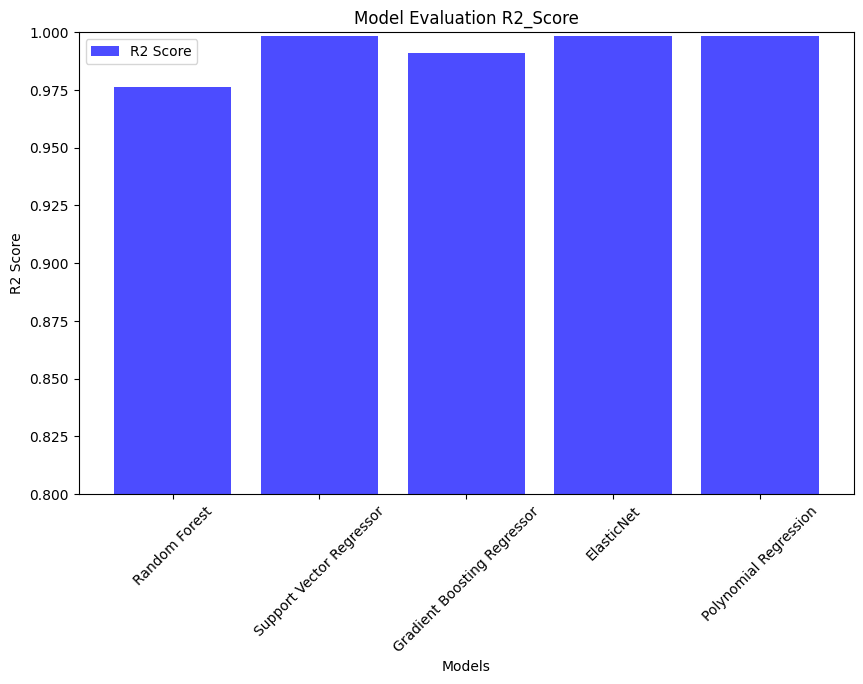

In [21]:


data = {
    "Model": ["Random Forest", "Support Vector Regressor", "Gradient Boosting Regressor",
              "ElasticNet", "Polynomial Regression"],
    "R2 Score": [rf_r2, svr_r2, gbr_r2, en_r2, pol_r2],
    "MAPE": [rf_mape, svr_mape, gbr_mape, en_mape, pol_mape],
    "Explained Variance": [rf_ev, svr_ev, gbr_ev, en_ev, pol_ev]
}


df = pd.DataFrame(data)
df.to_csv("model_scores_v1.csv", index=False)


plt.figure(figsize=(10, 6))
plt.bar(df["Model"], df["R2 Score"], alpha=0.7, label=("R2 Score"), color='blue')


plt.title("Model Evaluation R2_Score")
plt.xlabel("Models")
plt.ylabel("R2 Score")
plt.ylim(0.8,1)
plt.xticks(rotation=45)
plt.legend()


plt.savefig("model_scores_plot_v1.png")
plt.show()
